# SIXT33N Project
## Phase 2: System Identification

### EECS 16B: Designing Information Devices and Systems II, Spring 2021
-----

## <span style="color:navy">Table Of Contents</span>
-----

* ### [Note](https://drive.google.com/file/d/1VW30TAqUTtJG9igXJ86DSnFuFW-DT32V/view?usp=sharing)
* [Introduction](#intro)
* [Part 1: Installing the Encoders](#part1)
* [Part 2: Sensor Verification](#part2)
* [Part 3: Changing to Battery](#part3)
* [Part 4: Open Loop Data Collection and Parameter Estimation](#part4)
* [Part 5: Determining the Operating Point](#part5)
* [Part 6: Micboard Verification](#part6)

<a id='intro'></a>
## <span style="color:navy">Introduction</span>
-----

Please make sure to read the note before you begin the lab. 
**Remember to document all design choices you made and explain them in the project report.**

<a id='part1'></a>
## <span style="color:navy">Part 1: Installing the Encoders</span>
-----

### Materials: 
- 2 encoders (aka photointerrupter modules, shown below)
- 2 plastic encoder wheels (plastic wheel with lots of rectangular holes)
- Launchpad
- 8 jumper wires

### Tasks: 

**1. Put the photointerrupter modules in their slots as shown below.**
<br/><br/>
<center>
<img width="400px" src="images/proj-car-encoder1.jpg">
</center>

**2. Connect the encoders to the Launchpad as follows:**
* Use 4 jumper wires per encoder. 3 will connect from the encoder to your breadboard, 1 will connect from your breadboard to your Launchpad. You should **twist or braid all three wires from the encoder to the breadboard together** - this will help shield the signal wire from external noise sources.
* Connect the 'G' (ground) pins to ground on your breadboard.
* Connect the 'V' (voltage) pins to the 3.3V rail of your breadboard.
* For each of your 'S' (signal) pins: 
    - Build a resistive voltage divider with reasonably-valued ($ \geq1k\Omega $) resistors such that a `HIGH` ($3.3V$) signal from the encoder is reduced to a voltage between $2.0V$ and $2.5V$. (Hint: you can accomplish this with one $1k\Omega$ and one $2k\Omega$ resistor).
    - Connect the encoder signal pin to the input of the voltage divider.  
* Connect the output (between the two resistors) of the left voltage divider to the Launchpad `P6.2` and the output (between the two resistors) of the right voltage divider to `P6.3`.
    - If these pins are no longer functional, any free pins of `P6.0` to `P6.6` or `P7.0` will also work

<a id='part2'></a>

## <span style="color:navy">Part 2: Sensor Verification</span>
-----


### <span style="color:navy">Encoder Verification</span>

In general, there are two major types of error in sensing the car's trajectory. The first is noise in the sensor signals. The second is from mechanical differences between the two sides of the car.

In this section we will test for and fix the first type of noise. The mechanical type primarily affects performance over long distances, so we can compensate for it after implementing closed-loop control.


### Materials:
- Launchpad and cable
- Car with encoders installed
- 9V Wall Adapter

### Tasks: 
0. If you still have your micboard still set up and connected to your 3.3V rail, disconnect it from power temporarily as we will not be using it in this lab.
1. Connect the Launchpad's USB.
2. Connect one of the ground pins on the Launchpad to the ground rail of your breadboard.
3. Connect your 9V wall adapter to power your motors (connect it through the switch, just like in the Front End lab) as well as your regulators to power your encoders.
4. **Connect the input resistor of the left motor's driver circuit to `P2.0` and the input resistor of the right motor's driver circuit to `P1.5`.** (Connect the pins to the ends of the resistors that are NOT connected to the BJT)
5. **If your encoders are powered properly, the LEDs on each one should blink when you pass something through the encoders.**
6. Remove the encoder wheels (the plastic disk with holes in it) if they are on the car. Upload **`encoder_test_0_ticks.ino`** to the Launchpad.
7. Open the serial monitor.
8. **Set the baud rate to `38400`**.
9. Press reset.
10. Follow the instructions on the serial monitor.
    - **Your car wheels are going to move.** Make sure that you hold the car above the table/ground. Don't let your car jump off the table.
    - Button P2.1 is the bottom left button of the LaunchPad.
    - The test will conduct 4 phases: both wheels at rest, one wheel driving, the other wheel driving, and both wheels driving.
    - If your encoders are functioning properly, the serial monitor should print "Success" or "Success if encoder wheels are off" after each phase, and display all 0s (or at least no more than a few ticks) for the ticks per phase. Note that if your car is mis-wired, this could be a false negative.
    - This diagnostics message will be followed up by a long and repeating string of the actual values measured during the duration of the program. If you want to look at just the encoder diagnostics, make sure to untick `Autoscroll` in the bottom left of the Serial Monitor window.
11. Attach the encoder disk as shown below.
    - If it is on, make sure to remove the paper sticker from your car frame (yes, it does come off) before you attach the encoders.
    - If some of the holes on the encoder wheel were not fully cut out, use a screwdriver to push the material out.
12. Re-run the tests. If your car is connected correctly, **the tests should show several hundred encoder ticks**, ruling out a false negative. You should also see it print "Failure if encoder wheels are off. Success if encoder wheels are on."

<img width="400px" src="images/proj-car-encoder2.jpg">




<a id='part3'></a>

## <span style="color:navy">Part 3: Changing to Battery Power</span>
-----



Now we want to use 9V batteries to run the car on the ground. 

***If you are testing things at your desk, use the 9V wall adapter.*** The battery does not contain a lot of energy and the motors take a lot of power. If you leave it running it will only last a little over an hour. If the voltage of the battery drops below 7.8V, you will need a new battery.

### Materials
- 2 x 9V batteries + battery leads (knotted to prevent shorting)

### Tasks:
1. Take the 9V wall adapter off the motor drivers.
  - **Never leave both the 9V wall adapter and the battery connected at the same time. Don't do it.**
2. Connect one battery to the switch and the other to the voltage regulators.
   - When using the batteries, because you can directly connect the battery cap to the 9V battery itself, the red is 9V and black is ground, unlike the wall adapter. Refer back to our [tutorial video](https://www.youtube.com/watch?v=DPLfrsyz99w&list=PLhIxXDRJ9_VqxwlybfFHzihu1e3-Ll433&index=3&t=1s) for powering your breadboard if you're unsure.
   - The grounds of the 9V battery leads should go to the ground rails of the circuit.
3. Knot your battery leads as shown in the image below.
    - This will drastically decrease the chance that the leads will accidentally short and kill your battery.

<img width="200px" src="images/proj-batt-lead.jpg">

**4. Use your multimeter again to check that the output of your regulator is still 5V and nothing was shorted.</span>**

<span style="color:red"> 5. Up till now, the Launchpad has been powered through the computer via the USB. **Disconnect the USB cable that is powering the Launchpad.** To power it through the battery, connect the 5V pin on the Launchpad to the 5V row on your breadboard.</span>

<span style="color:red">6.  **Never simultaneously power the MSP with both the computer (USB) and the 5V through your breadboard.** </span>
- **Don't do it.** If you leave both connected for too long, the computer will not recognize your Launchpad due to power overload at the COM port and your Launchpad will likely get fried and stop working.

### Summary:

At any point, your car should be powered with either of the following two configurations:

1. **Tethered Configuration**: When uploading launchpad code or downloading data to the computer: 

<img width="700px" src="images/PowerDiagram2.png">

2. **Mobile configuration**: When running the car away from the computer: 

<img width="700px" src="images/PowerDiagram1.png">



<a id='part4'></a>
## <span style="color:navy">Part 4: Open Loop Data Collection and Parameter Estimation</span>
-----

Now, you will collect the data by uploading the sketch **`dynamics_data.ino`**. Glance through the sketch - it records the position of each wheel while varying the input signal $u[k]$ linearly from HIGH_PWM to LOW_PWM and back up. The sampling period is $T_s = 500\mathrm{ms}$. A long sampling period is used to minimize error due to quantization, the rounding error from measuring only integer encoder ticks.

**Important: For this first test, make sure that you are using the first set of 5 parameters in code block `SID1`** (abbreviated from System ID 1). These parameters will sweep through a range of PWM values, from 200 to 100 and back to 200 (the maximimum value a PWM can have is 255 and minimum is 0), while collecting 2 samples per PWM. The car will start fast, slow down, and speed back up during the test (it's possible that the car may stop in the middle before driving again if a PWM of 100 is not enough to get it to drive).

### 4.1. About Data Collection:
1. We will being using **`dynamics_data.ino`** to collect data for our car and read it to the serial monitor.
2. Upon being uploaded to the MSP, **`dynamics_data.ino`.** does either one of two things, depending on whether the **`WRITE`** variable located at the top of the code is **`1`** or **`0`**. 
    - If **`WRITE == 1`** - The car upon having the leftmost bottom button pressed will run and collect data, then write it into nonvolatile (permanent) memory called flash, which will survive between resets and power supply removal, unlike volatile memory like RAM. The collected data will be overwritten if data collection is run again.
    - If **`WRITE == 0`** - The car upon having its leftmost bottom button pressed will read data collected from its last run that is stored in flash and output it onto the Serial Monitor.

Here are somethings to keep in mind:

In general: 

- The leftmost button is unresponsive at times, so you may have to press it multiple times. You will know you have succeeded in making the MSP bend to your will if the LEDs blink.
- If things are still unresponsive, press the reset button.
- **Don't connect both 5V from the voltage regulator and the USB from the computer to the MSP at the same time. This tends to fry the launchpad.**

If running the car and collecting data:

- Remember that the MSP needs power from 5V pin if not connected to the Computer
- **Secure your MSP** to your car so that it does not fall off while the car is moving!
- Look for a large space to run your car. You want to try to minimize the number of collisions it makes with the objects or walls around it for the best data.
    - If it's on a collision course with an object or wall you can quickly pick it up and change its direction before it hits.
- Your car will most likely not go straight. Think about why this is.
- Make sure you flip the switch to connect the motors to 9V before running it.
- If your car makes *very* tight circles (ie: radius less than 1 ft), talk to your GSI! Some quick fixes may be:
    - Check to see if your motor wheels are turning in the right direction (the back of the car is the castor wheel).
    - Making sure the castor wheel (the white wheel that swivels) is aligned with your car (straight, and not turned at an angle) before running dynamics_data.ino. You may need to accomplish this by restraining the sides of the wheel with either wires or tape.
    - Using a smaller range of PWM values (i.e. 90-150 instead of 100-200)
    - Try to find a wide, flat space to run your car. If you can't get access to a space like this, make sure your car doesn't bump into walls (pick it up and redirect it before it collides).
    - If you fry one of your PWM pins, you can use one of the other PWM pins, which are `P1.4`, `P1.5`, `P2.0`, `P2.4`, and `P2.5`.

If reading the data from the MSP:

- The data is printed in lines as comma separated 3-tuples. 
- Copy and paste, ONLY these 3-tuples, nothing else.
- Your data should look something like this (albeit with more data points):
<img width="400px" src="images/data_coarse_example.png">


### 4.2. Coarse Data Collection:

<img width="400px" src="images/example_coarse_data.png">

We want to get a general idea of not only how your motors react to different input PWMs, but also figure out if there are any mechanical differences that we may need to account for in the future. To do this, we will allow our car to run for a while given a large range of input PWMs.

The example plot above shows an example of extreme differences between two wheels. The "ascending" plot is when the car is speeding up (as it increases from `LOW_PWM` to `HIGH_PWM`) and the descending plot is the opposite. _What is wrong with the plot above? Are the motors working properly throughout the entire run?_


#### Tasks:
1. Upload `dynamics_data.ino` onto your Launchpad with WRITE == 1.
2. Unplug the USB and plug in the 5V pin on your Launchpad to power it with the batteries. Remember you cannot leave both the USB and the 5V pin connected at the same time or your Launchpad will kick the bucket and fry.
3. Place your car on the ground and push button `P2.1` (bottom leftmost button) once you're ready and let the car run.
4. Once it finishes and comes to a stop (after completing the slowdown and speedup), flip the switch to disconnect the motors from power and bring your car back to your computer. Unplug the 5V pin from your launchpad and plug in the USB. Upload dynamics_data.ino again, but this time with WRITE == 0.
5. Push button `P2.1` and copy the data from the serial monitor and paste it into a text file called **`data_coarse.txt`.** You may need to turn off `Autoscroll`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

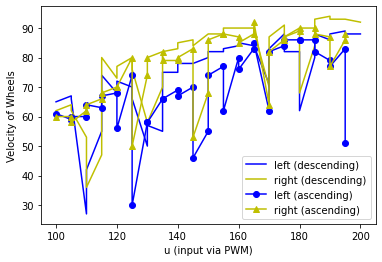

In [3]:
with open('data_coarse.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])

# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]


u = data[:, 0].reshape((-1, 1)) # duty cycle
left_des, left_asc = np.array_split(vleft, 2)

right_des, right_asc = np.array_split(vright, 2)

u_des, u_asc = np.array_split(u, 2)

plt.plot(u_des, left_des, 'b-',  u_des, right_des, 'y-')
plt.plot(u_asc, left_asc, 'b-o',  u_asc, right_asc, 'y-^')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
labels = ("left (descending)", "right (descending)",
          "left (ascending)" , "right (ascending)")
plt.legend(labels, loc=0)
plt.show()

### 4.3. Fine Data Collection

Now we'll collect data appropriate for least-squares to find a linear approximation for the behavior of your motors. In normal operation, the car only has to run within a small range of velocities, so we collect more samples at each PWM, over a smaller PWM range. 

#### Tasks:
1. **Comment out the first set of 5 parameters and uncomment the second set in code block `SID1`.**

2. **Set *LOW_PWM* and *HIGH_PWM*** so that the chosen PWM range is (more or less) linear on your coarse plot from the previous step.

3. Follow the steps from Task 4 and run the program again. If your car is making *very* tight circles refer to Task 4.
    
4. This time, copy the data to a text file called `data_fine.txt`, instead of `data_coarse.txt`.

5. Perform least-squares regression on your data as outlined in the sections below entitled **Least-Squares Regression** and **Evaluate Your Fit**.

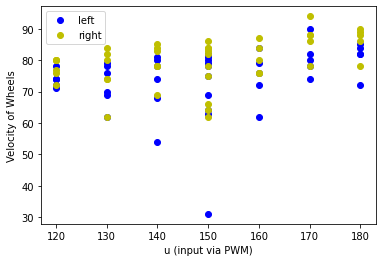

In [4]:
with open('data_fine.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])
    
# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]

u = data[:, 0].reshape((-1, 1)) # duty cycle

plt.plot(u, vleft, 'bo',  u, vright, 'yo')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)
plt.show()

### 4.4. Least-Squares Regression

Now that we have some data, we can try performing least-squares regression. Try to think about what least-squares problem we are solving, what equations are we using, and what the variables we are solving for mean.

#### Tasks
1. Write a function that takes the data as parameters, performs least squares, and extracts the parameters. The functions [`np.hstack`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html), [`np.ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), [`np.shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html), [`np.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) will be helpful here.
    - If you are having trouble figuring out how to setup the least square problem, check the [lab note](https://drive.google.com/file/d/1VW30TAqUTtJG9igXJ86DSnFuFW-DT32V/view?usp=sharing) for some helpful insight.
    
2. Call the function once for each wheel.

3. Record the values of $\theta$ and $\beta$ for each wheel.

In [5]:
# Write a function that formulates and performs least squares
# and returns theta and beta for one wheel
def identify_parameters(u, v):
    # Returns (theta, beta) for given (u, v)
    # YOUR CODE HERE
    negative_ones = -1 * np.ones(np.shape(u))
    A = np.hstack((u, negative_ones)) # [u -1s]
    return np.linalg.lstsq(A, v)[0] # (A^T * A)^(-1) * A^T * b

# extract parameters, call your function here
theta_left, beta_left = identify_parameters(u, vleft) # 0, 0
theta_right, beta_right = identify_parameters(u, vright) # 0, 0

print("float theta_left = {:.4g};".format(theta_left))
print("float theta_right = {:.4g};".format(theta_right))
print("float beta_left = {:.4g};".format(beta_left))
print("float beta_right = {:.4g};".format(beta_right))

float theta_left = 0.1371;
float theta_right = 0.1688;
float beta_left = -53.96;
float beta_right = -54.68;


<ipython-input-5-6babcf0ebd79>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, v)[0] # (A^T * A)^(-1) * A^T * b


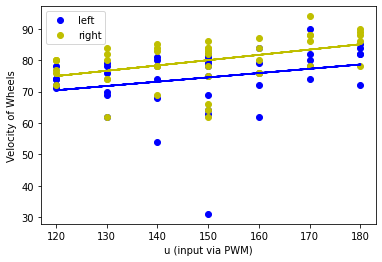

In [6]:
# plot results of least squares fit 
u = u.reshape(-1)
vleft_LS = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft, 'bo',  u, vright, 'yo', u, vleft_LS, 'b-', u, vright_LS, 'y-')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)

### 4.5. Evaluate Your Fit

#### Tasks
1. **Inspect the linearity of this plot and the coarse data plot.**
2. **If you think a different range of PWM may be more linear, change HIGH_PWM and LOW_PWM in the .ino file.**
    - Be careful so your car does not run too close to the minimum or maximum PWM (0 and 255).
    - If our control scheme saturates (e.g. maxes at 255) an input, the car is much harder to control.
3. Run the simulation below.

To test that we have estimated the parameters accurately, we will simulate the model using the parameters we have found. When we compare the simulated data with the collected data, we expect them to match up pretty well. 

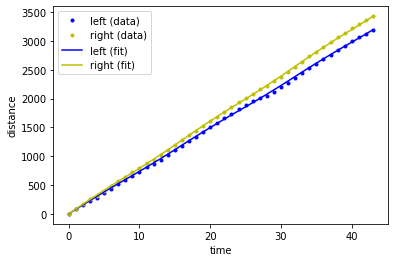

In [7]:
# model for simulation 
def sim(d0, u, theta, beta):
    d = np.zeros(len(u)+1)
    d[0] = d0
    for t in range(len(u)):
        d[t+1] = d[t] + theta*u[t] - beta
    return d
def get_distances_from_velocities(v):
    d = np.zeros(len(u) + 1)
    d[0] = 0
    for t in range(len(u)):
        d[t+1] = d[t] + v[t] 
    return d
        
# plot simulated trajectories 

dleft = get_distances_from_velocities(vleft)
dright = get_distances_from_velocities(vright)

dleft_simulated  = sim(0, u, theta_left, beta_left)
dright_simulated = sim(0, u, theta_right, beta_right)
plt.plot(dleft, 'b.', 
         dright, 'y.',
         dleft_simulated, 'b-', 
         dright_simulated, 'y-',
        )
plt.xlabel("time")
plt.ylabel("distance")
plt.legend(("left (data)", "right (data)", "left (fit)", "right (fit)"), loc='upper left')

<a id='part5'></a>
## <span style="color:navy">Part 5: Determining the Operating Point</span>
-----

**Make sure you read the linear least squares section of the note before beginning this section!**

In general, each wheel may have a different range of velocities, illustrated here.


<img src="./images/partial_overlap_lsq.png">


In order for the car to drive straight, the wheels must be moving at the same velocity. However, the motors (and hence the wheels) have different achievable velocity ranges, so we need to set the operating point to a velocity achievable by both wheels. A good choice of target velocity is the midpoint of the overlapping range of velocity. The below cell will calculate this.

Velocity range = [74.9, 78.6]

Operating point:
float v_star = 76.8;


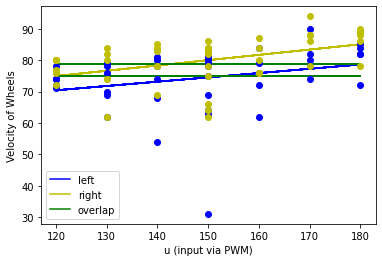

In [8]:
min_vel = max(min(vleft_LS), min(vright_LS))
max_vel = min(max(vleft_LS), max(vright_LS))
print('Velocity range = [{:0.1f}, {:0.1f}]'.format(min_vel, max_vel))
midpoint = (min_vel+max_vel)/2
print('\nOperating point:\nfloat v_star = {:.1f};'.format(midpoint))

u = u.reshape(-1)
vleft_LS = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft_LS, 'b-', u, vright_LS, 'y-')
for i in (min_vel, max_vel):
    plt.plot(u, 0*u + i, 'g-')
plt.plot(u, vleft, 'bo',  u, vright, 'yo')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right", "overlap"), loc=0)

<a id='part6'></a>
## <span style="color:navy">Part 6: Micboard Verification (optional)</span>
-----

We will be using the micboard again in the SVD/PCA lab. It is good to verify that the launchpad can read the voice signal from your front-end circuit. 

### Materials:
- Car
- Launchpad + USB cable

### Tasks:
1. Upload <b>`adc_read.ino`</b> to the Launchpad.
2. Connect pin `6.0` to the output of your microphone front-end circuit.
3. Connect the ground of the Launchpad to the ground of your circuit.
4. **Press the reset button on your Launchpad.**
5. In `terminal` or your operating system's equivalent command line, run **`python adc_read.py -D COM###`** (substitute `###` with the proper number from Device Manager).

### Notes/Tips:
- If you see a graph on your screen with a signal that changes when you make noises at your microphone and is centered in the middle of the graph, then you have succeeded! Congratulations!

- If this step fails, make sure that you make it work before the SVD/PCA lab. You won't be able to do that lab without going through this step!

## <span style="color:#ba190f">CHECKOFF</span>
-----
- **Show your GSI your data collection and parameters.** Your TA will double check your parameters and graphs. 
- Think about the following questions for checkoff:
    - What is the difference between `data_coarse.txt` and `data_fine.txt`?
    - How did we come to finding theta and beta?
    - Why did we have to model each wheel seperately?
    - How could we use this model to make our car drive straight?
- <span style="color:red">SAVE ALL YOUR DATA!!</span>